In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model , Sequential

1/1 [==============================] - 1s 672ms/step


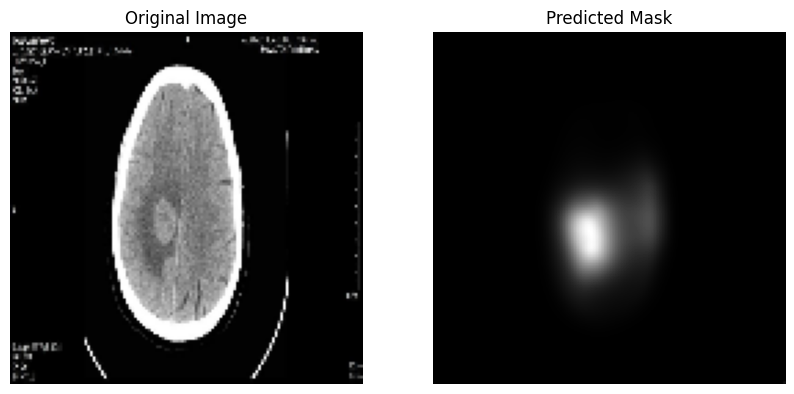

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Model/drive-download-20240724T153752Z-001.zip (Unzipped Files)')

# Preprocess the test image
def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image / 255.0
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)   # Add batch dimension
    return image

test_image_path = '/content/tumor 2.png'
input_size = (128, 128)  # Replace with your model's expected input size
preprocessed_image = preprocess_image(test_image_path, input_size)

# Make predictions
predictions = model.predict(preprocessed_image)
predicted_mask = np.squeeze(predictions)

# Display the image and the predicted mask
def display_image_and_mask(image_path, mask):
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    original_image = cv2.resize(original_image, (mask.shape[1], mask.shape[0]))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Predicted Mask')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()
display_image_and_mask(test_image_path, predicted_mask)